# Анализ тарифных планов федерального оператора сотовой связи «Мегалайн»

**Цель проекта**
Сравнить доходность двух тарифных планов «Смарт» и «Ультра» для корректировки рекламного бджета

**Источник данных**
Данные федерального оператора сотовой связи «Мегалайн» о 500-х пользователех

**Этапы выполнения проекта**
* Загрузка данных
* Предварительный анализ и обработка данных
* Исследовательский анализ данных 
* Расчет помесячной выручки
* Проверка гипотезы 1: средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается
* Проверка гипотезы 2: средняя выручка от пользователей из Москвы отличается от выручки от пользователей других регионов 
* Формулировка выводов

**Описание тарифов**

*Тариф «Смарт»*

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- Минута разговора — 3 рубля. \
- Сообщение — 3 рубля.
- 1 Гб интернет-трафика — 200 рублей.

*Тариф «Ультра»*

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- Минута разговора — 1 рубль;
- Сообщение — 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.

**Загрузка библиотек**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Открытие файлов с данными и изучение общей информации

In [2]:
# Откроем файл /datasets/calls.csv и сохраним датафрейм в переменную calls.
calls = pd.read_csv('/datasets/calls.csv')

In [3]:
# Выведем первые 5 строк датафрейма calls
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# Выведем основную информацию для датафрейма calls с помощью метода info()
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


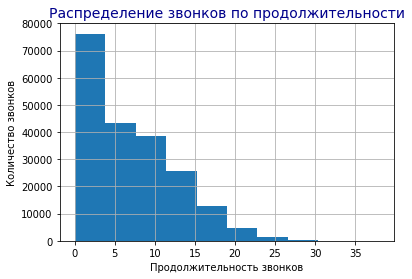

In [5]:
# Выведем гистограмму для столбца с продолжительностью звонков
calls['duration'].hist()
plt.title('Распределение звонков по продолжительности', size = 14, color = 'darkblue')
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество звонков')
plt.show()

In [6]:
# откроем файл /datasets/internet.csv и сохраним датафрейм в переменную sessions.
sessions = pd.read_csv('/datasets/internet.csv')

In [7]:
# Выведем первые 5 строк датафрейма sessions
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
#  Выведем основную информацию для датафрейма sessions с помощью метода info().
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


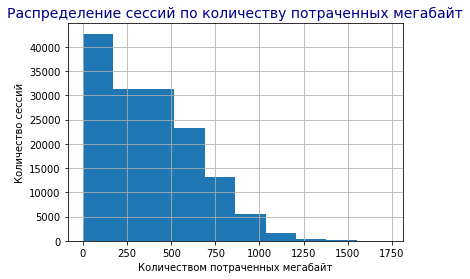

In [9]:
# выведем гистограмму для столбца с количеством потраченных мегабайт.
sessions['mb_used'].hist()
plt.title('Распределение сессий по количеству потраченных мегабайт', size = 14, color = 'darkblue')
plt.xlabel('Количеством потраченных мегабайт')
plt.ylabel('Количество сессий')
plt.show()

In [10]:
# Откроем файл /datasets/messages.csv, сохраните датафрейм в переменную messages.
messages = pd.read_csv('/datasets/messages.csv')

In [11]:
# Выведем первые 5 строк датафрейма messages
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
# Выведем основную информацию для датафрейма messages с помощью метода info()
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
# Откроем файл /datasets/tariffs.csv, сохраните датафрейм в переменную tariffs
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [14]:
# Выведем весь датафрейм tariffs
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
# Выведем основную информацию для датафрейма tariffs с помощью метода info()
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
# Откроем файл /datasets/users.csv, сохраните датафрейм в переменную users
users = pd.read_csv('/datasets/users.csv')

In [17]:
# Выведем первые 5 строк датафрейма users
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
# Выведем основную информацию для датафрейма users с помощью метода info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Предварительная подготовка данных

Приведем столбцы

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу с помощью метода `to_datetime()`

In [19]:
users['reg_date'] = pd.to_datetime(users['reg_date']) # обработка столбца reg_date
users['churn_date'] = pd.to_datetime(users['churn_date']) # обработка столбца churn_date

calls['call_date'] = pd.to_datetime(calls['call_date']) # обработка столбца call_date

messages['message_date'] = pd.to_datetime(messages['message_date']) # обработка столбца message_date
sessions['session_date'] = pd.to_datetime(sessions['session_date']) # обработка столбца session_date

Нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Однако в столбце `duration` датафрейма `calls` значения дробные. Округлим значения столбца `duration` вверх с помощью метода `numpy.ceil()` и приведем столбец `duration` к типу `int`.

In [20]:
# округление значений столбца duration с помощью np.ceil() и приведение типа к int
calls['duration'] = np.ceil(calls['duration']).astype(int)

Удалим столбец Unnamed: 0 из датафрейма sessions. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (df.to_csv(..., index=column)). Он сейчас не понадобится.

In [21]:
# Удалим столбец Unnamed
sessions.drop(columns='Unnamed: 0', inplace=True)

In [22]:
# Создадим столбец month в датафрейме calls с номером месяца из столбца call_date
calls['month'] = calls['call_date'].dt. month

In [23]:
# Создадим столбец month в датафрейме messages с номером месяца из столбца message_date
messages['month'] = messages['message_date'].dt. month

In [24]:
# Создадим столбец month в датафрейме sessions с номером месяца из столбца session_date
sessions['month'] = sessions['session_date'].dt. month

In [25]:
# Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [26]:
# вывод 10 первых строк на экран
calls_per_month.head(10)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраните в переменную minutes_per_month. 
Выведем первые 10 строчек minutes_per_month

In [27]:
# Создадим таблицу minutes_per_month
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
minutes_per_month.head(10)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраните в переменную messages_per_month. 
Для этого сгруппируем датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев; после группировки выберем столбец message_date; затем применим метод для подсчёта количества.
Выведем первые 10 строчек messages_per_month.

In [28]:
# Создадим таблицу messages_per_month
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))
messages_per_month.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя и сохраним в переменную `sessions_per_month`. Для этого нужно:

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- затем применить метод для подсчёта суммы: `.agg({'mb_used': 'sum'})`

In [29]:
# Создадим таблицу sessions_per_month 
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
sessions_per_month.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

## Анализ данных и подсчёт выручки

Объединим все посчитанные выше значения в один датафрейм user_behavior. Для каждой пары «пользователь — месяц» будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [30]:
# посчитаем долю клиентов, которые расторгли договор
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

In [31]:
# объединим таблицы
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [32]:
# Проверим пропуски в таблице user_behavior после объединения
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [33]:
# Заполним образовавшиеся пропуски в данных
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [34]:
# переименуем столбец tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [35]:
# Присоединим информацию о тарифах
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [36]:
# Считаем количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

In [37]:
# Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец paid_gb
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

In [38]:
# Считаем выручку за минуты разговора, сообщения и интернет
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

In [39]:
# Считаем помесячную выручку с каждого пользователя, она будет храниться в столбце total_cost
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Датафрейм stats_df для каждой пары «месяц — тариф» будет хранить основные характеристики

In [40]:
# сохраним статистические метрики для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


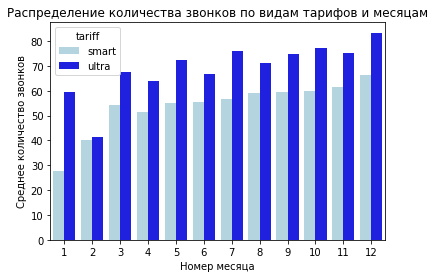

In [41]:
# Построим распределение среднего количества звонков по видам тарифов и месяцам
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

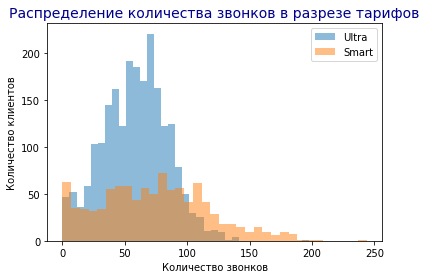

In [42]:
# Построим распределение количества звонков в разрезе тарифов
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Ultra', 'Smart'])
plt.title('Распределение количества звонков в разрезе тарифов', size = 14, color = 'darkblue')
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

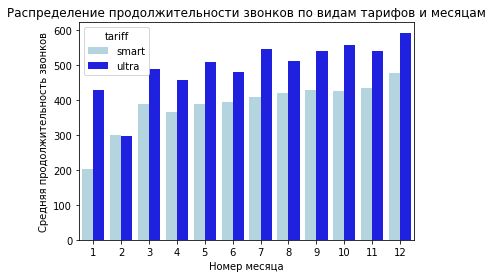

In [43]:
# Построим распределение средней продолжительности звонков по видам тарифов и месяцам
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

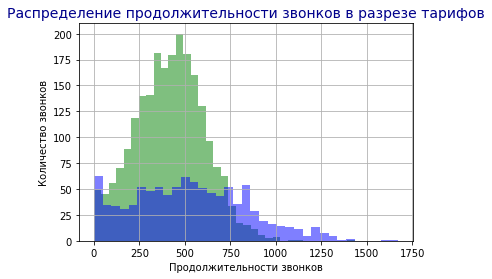

In [44]:
# Построим распределение продолжительности звонков в разрезе тарифов
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
plt.title('Распределение продолжительности звонков в разрезе тарифов', size = 14, color = 'darkblue')
plt.xlabel('Продолжительности звонков')
plt.ylabel('Количество звонков')
plt.show()

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

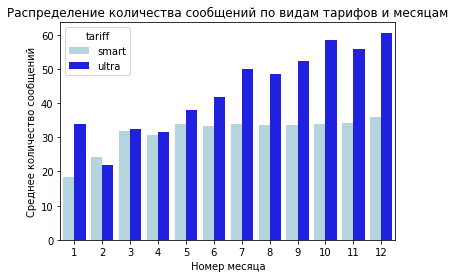

In [45]:
# Построим распределение среднего количества сообщений по видам тарифов и месяцам
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

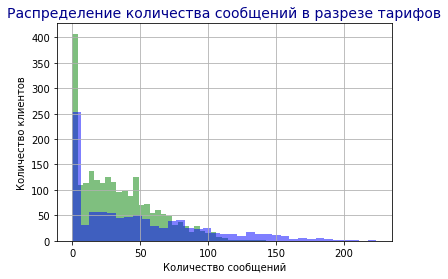

In [46]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')
plt.title('Распределение количества сообщений в разрезе тарифов', size = 14, color = 'darkblue')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов')
plt.show()

В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

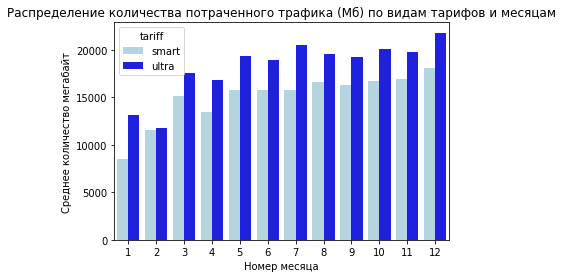

In [47]:
# Построим распределение количества потраченного трафика (Мб) по видам тарифов и месяцам
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

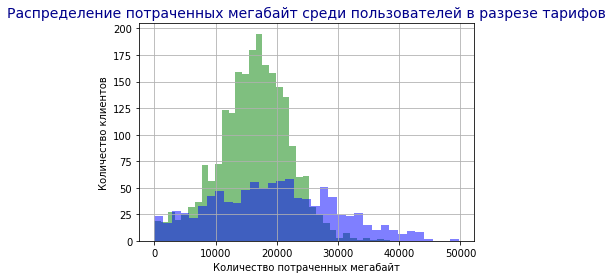

In [48]:
# Сравним потраченных мегабайт среди пользователей тарифов Smart и Ultra
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')
plt.title('Распределение потраченных мегабайт среди пользователей в разрезе тарифов', size = 14, color = 'darkblue')
plt.xlabel('Количество потраченных мегабайт')
plt.ylabel('Количество клиентов')
plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 ГБ.

## Проверка гипотез

Проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

- H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
- H_1: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`

alpha = 0.05

In [49]:
results =  st.ttest_ind(user_behavior.loc[user_behavior['tariff'] =='ultra', 'total_cost'], user_behavior.loc[user_behavior['tariff'] =='smart', 'total_cost'], equal_var=False) # вызов метода для проверки гипотезы

alpha = 0.05 

print(results.pvalue) 

if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу', sep='\n')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу', sep='\n')

4.2606313931076085e-250
4.2606313931076085e-250
Отвергаем нулевую гипотезу


Проверим гипотезу: средняя выручка с пользователей из Москвы отличается от выручки c пользователей других регионов;

- H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
- H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`

alpha = 0.05

In [50]:
results =  st.ttest_ind(user_behavior.loc[user_behavior['city'] =='Москва', 'total_cost'], user_behavior.loc[user_behavior['city'] !='Москва', 'total_cost'], equal_var=False)

alpha = 0.05 

print(results.pvalue) 

if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу', sep='\n')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу', sep='\n')

0.5257376663729298
0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

- Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. 
- В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. 
- Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. 
- В феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.
- В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart.
- Количество сообщений в течение года на обоих тарифах растёт. 
- Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.
- Меньше всего пользователи использовали интернет в январе, феврале и апреле. 
- Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 ГБ.


Гипотеза "Выручка (total_cost) пользователей Ultra равна выручке (total_cost) пользователей Smart" была отвергнута в ходе исследования.

Гипотеза "Выручка (total_cost) пользователей из Москвы равна выручке (total_cost) пользователей не из Москвы" не была отвергнута в ходе исследования.

Результаты анализа говорят о том, что с точки зрения выручки тариф Ultra является более перспективным по сравнению с тарифом Smart.  Следовательно, рекомендуем проведение рекламной компании по тарифу Ultra.